In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Utils.DataAnalysis import *
from Utils.CorrelationFiltering import *
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Load the CSV file
data = pd.read_csv('Data/Data.csv')

In [2]:
# Separate the features and target variable
X = data.iloc[:, :-1]  # Features
y = data['label']  # Target variable

# Split the dataset into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [5],
    'min_samples_split': [2, 4, 8, 16],
    'n_jobs': [-1]
}

# Create the Random Forest classifier
rf = RandomForestClassifier()

# Perform grid search cross-validation to find the best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters found
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Create the final Random Forest model with the best parameters
final_rf = RandomForestClassifier(**best_params)

# Train the model on the whole train set
final_rf.fit(X_train, y_train)

# Evaluate the model on the train set
y_pred = final_rf.predict(X_train)

# Calculate and display the confusion matrix for the train set
confusion = confusion_matrix(y_train, y_pred)
print("Confusion Matrix (Train Set):\n", confusion)

# Evaluate the model on the test set
y_pred = final_rf.predict(X_test)

# Calculate and display the confusion matrix for the test set
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Test Set):\n", confusion)

# Perform cross-validation with the final model and display the confusion matrix for each fold
cv_scores = cross_val_score(final_rf, X_train, y_train, cv=5)
print("Cross-Validation Confusion Matrices:")
for i, score in enumerate(cv_scores):
    print("Fold", i+1, "Confusion Matrix:\n", score)

# Train the model on the whole dataset (train + test)
final_rf.fit(X, y)

# Make predictions on the whole dataset
y_pred_full = final_rf.predict(X)

# Calculate and display the confusion matrix for the whole dataset
confusion_full = confusion_matrix(y, y_pred_full)
print("Confusion Matrix (Whole Dataset):\n", confusion_full)

Best Parameters: {'max_depth': 5, 'min_samples_split': 8, 'n_estimators': 50, 'n_jobs': -1}
Confusion Matrix (Train Set):
 [[ 474 1654]
 [  79 5127]]
Confusion Matrix (Test Set):
 [[ 106  482]
 [  29 1217]]
Cross-Validation Confusion Matrices:
Fold 1 Confusion Matrix:
 0.7498295841854125
Fold 2 Confusion Matrix:
 0.7566462167689162
Fold 3 Confusion Matrix:
 0.7532379004771643
Fold 4 Confusion Matrix:
 0.7477845944103613
Fold 5 Confusion Matrix:
 0.7598908594815825
Confusion Matrix (Whole Dataset):
 [[ 637 2079]
 [ 118 6334]]


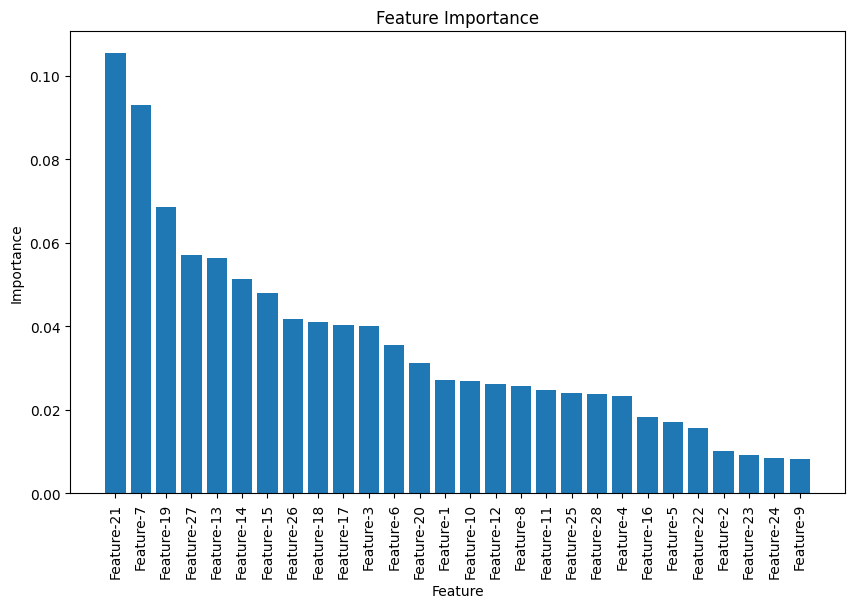

In [3]:
# Get the feature importances
feature_importances = final_rf.feature_importances_

# Create a DataFrame to store the feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances in a bar plot
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

interval columns not set, guessing: ['Feature-1', 'Feature-2', 'Feature-3', 'Feature-4', 'Feature-5', 'Feature-6', 'Feature-7', 'Feature-8', 'Feature-9', 'Feature-10', 'Feature-11', 'Feature-12', 'Feature-13', 'Feature-14', 'Feature-15', 'Feature-16', 'Feature-17', 'Feature-18', 'Feature-19', 'Feature-20', 'Feature-21', 'Feature-22', 'Feature-23', 'Feature-24', 'Feature-25', 'Feature-26', 'Feature-27', 'Feature-28', 'label']
Top 5 features selected by Mutual Information: Index(['Feature-21', 'Feature-3', 'Feature-17', 'Feature-7', 'Feature-11'], dtype='object')
Top 5 features selected by Phi_k Correlation: Index(['Feature-7', 'Feature-21', 'Feature-19', 'Feature-14', 'Feature-17'], dtype='object')


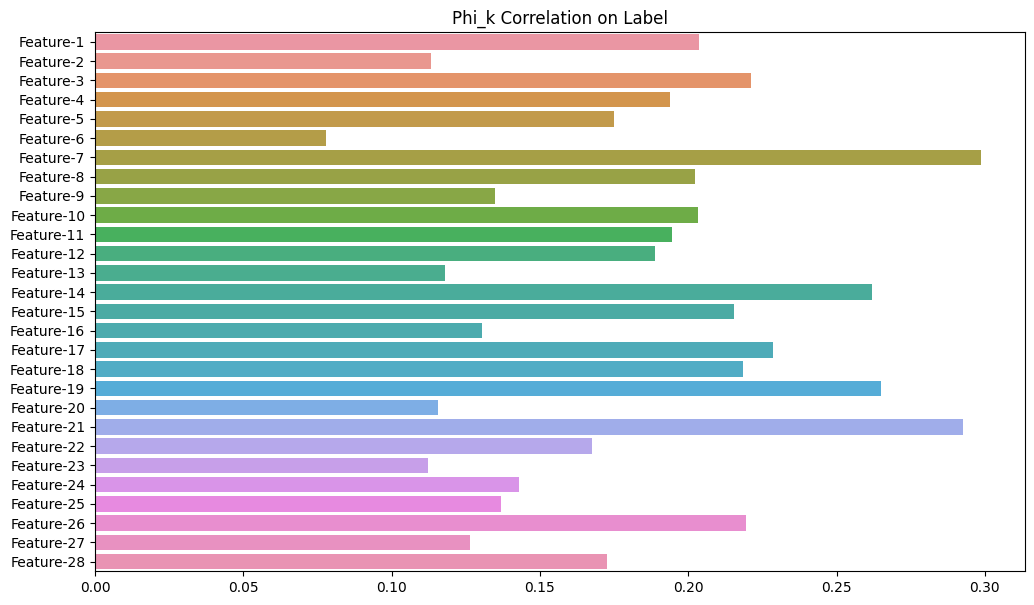

In [7]:
FeatureSelection(data)

The phi_correlation measure provides a similar evaluation of features as the feature importance scores of the classifier. It offers a valuable perspective for feature selection, allowing us to gain a better understanding of which features to consider.